In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

In [3]:
df_daily_calendar= pd.read_csv("daily_calendar_with_events.csv")
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [ ]:
# prompt: recomdaciones de codigo para esta csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

# Load the dataset
df_daily_calendar = pd.read_csv("daily_calendar_with_events.csv")

# 1. Data Exploration and Cleaning

# Display basic information
print(df_daily_calendar.info())
print(df_daily_calendar.describe())

# Check for missing values
print(df_daily_calendar.isnull().sum())

# Handle missing values (choose appropriate strategy based on the data)
# Examples:
# df_daily_calendar['column_name'].fillna(df_daily_calendar['column_name'].mean(), inplace=True) # For numerical columns
# df_daily_calendar['column_name'].fillna(df_daily_calendar['column_name'].mode()[0], inplace=True) # For categorical columns
# df_daily_calendar.dropna(subset=['column_name'], inplace=True) # Drop rows with missing values in a specific column

# Check for duplicate rows
print(f"Number of duplicate rows: {df_daily_calendar.duplicated().sum()}")
# Remove duplicates if necessary
# df_daily_calendar.drop_duplicates(inplace=True)


# 2. Feature Engineering (Example)

# Convert date column to datetime if necessary
if not pd.api.types.is_datetime64_any_dtype(df_daily_calendar['date']):  # Check if already datetime
    df_daily_calendar['date'] = pd.to_datetime(df_daily_calendar['date'])

# Extract features from the date
df_daily_calendar['year'] = df_daily_calendar['date'].dt.year
df_daily_calendar['month'] = df_daily_calendar['date'].dt.month
df_daily_calendar['day_of_week'] = df_daily_calendar['date'].dt.dayofweek  # Monday=0, Sunday=6
# Add other relevant date features as needed (day of month, quarter, etc.)


# 3. Encoding Categorical Features

# Identify categorical columns
categorical_cols = df_daily_calendar.select_dtypes(include=['object']).columns

# Choose appropriate encoding based on the nature of the categorical features
for col in categorical_cols:
  if len(df_daily_calendar[col].unique()) <= 10 : # Example threshold, adjust as needed
    le = LabelEncoder()
    df_daily_calendar[col] = le.fit_transform(df_daily_calendar[col])
  else:
    # use one hot encoder, target encoder or other methods when there is high cardinality
    # Example for one hot encoder:
    # df_daily_calendar = pd.get_dummies(df_daily_calendar, columns = [col])

# 4. Scaling Numerical Features

# Identify numerical columns
numerical_cols = df_daily_calendar.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove("index") # remove index or any other unnecesary columns

# Scale numerical features
scaler = MinMaxScaler()
df_daily_calendar[numerical_cols] = scaler.fit_transform(df_daily_calendar[numerical_cols])


# 5. Data Visualization (Examples)

# Histograms of numerical features
for col in numerical_cols:
    plt.figure()
    sns.histplot(df_daily_calendar[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots to detect outliers
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df_daily_calendar[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_daily_calendar.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Save the processed dataset
df_daily_calendar.to_csv("processed_daily_calendar.csv", index=False)


In [31]:
df_daily_calendar[df_daily_calendar.duplicates(in)]

array([nan, 'SuperBowl', 'Ramadan starts', 'Thanksgiving', 'NewYear',
       'Easter'], dtype=object)

In [33]:
df_daily_calendar.isnull().any()

,0
date,False
weekday,False
weekday_int,False
d,False
event,True


In [4]:
df_daily_calendar.isnull().any()

,0
date,False
weekday,False
weekday_int,False
d,False
event,True


In [5]:
df_daily_calendar.isnull().sum()

,0
date,0
weekday,0
weekday_int,0
d,0
event,1887


In [6]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [9]:
df_item_prices=pd.read_csv("item_prices.csv")
df_item_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [10]:
df_item_prices.isnull().any()

,0
item,False
category,False
store_code,False
yearweek,True
sell_price,False


In [23]:
df_item_prices[df_item_prices.duplicated(keep="first")]

,item,category,store_code,yearweek,sell_price
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
154,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


<Axes: >

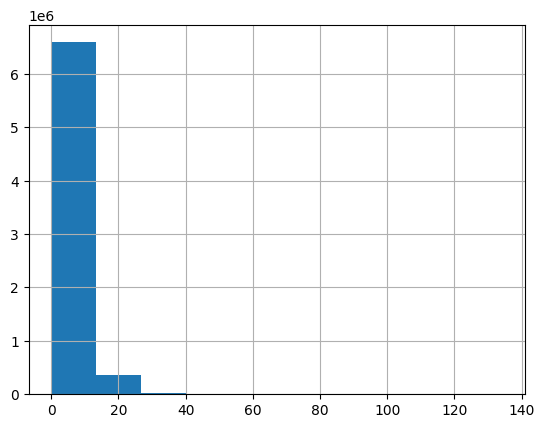

In [25]:
df_item_prices["sell_price"].hist()

In [26]:
df_item_prices["sell_price"].unique()

array([12.7414, 10.9858, 11.1454, ...,  4.956 ,  1.812 ,  2.28  ])

In [27]:
df_item_prices["sell_price"].value_counts()

,count
sell_price,
2.3760,221088
3.5760,217873
3.0000,189541
1.2000,150387
4.7760,142487
...,...
5.1875,1
4.7500,1
14.8625,1


In [51]:
df_item_sales= pd.read_csv("item_sales.csv")
df_item_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [60]:
df_item_sales[df_item_sales[columns].duplicated(keep="first")]


NameError: name 'columns' is not defined

In [57]:
# Contar las apariciones de cada "id"
id_counts = df_item_sales["id"].value_counts()

# Obtener los IDs que aparecen exactamente 2 veces
ids_with_2 = id_counts[id_counts == 2].index

# Filtrar el DataFrame para conservar solo las filas con esos IDs
filtered_df = df_item_sales[df_item_sales["id"].isin(ids_with_2)]

print(filtered_df)

Empty DataFrame
Columns: [id, item, category, department, store, store_code, region, d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9, d_10, d_11, d_12, d_13, d_14, d_15, d_16, d_17, d_18, d_19, d_20, d_21, d_22, d_23, d_24, d_25, d_26, d_27, d_28, d_29, d_30, d_31, d_32, d_33, d_34, d_35, d_36, d_37, d_38, d_39, d_40, d_41, d_42, d_43, d_44, d_45, d_46, d_47, d_48, d_49, d_50, d_51, d_52, d_53, d_54, d_55, d_56, d_57, d_58, d_59, d_60, d_61, d_62, d_63, d_64, d_65, d_66, d_67, d_68, d_69, d_70, d_71, d_72, d_73, d_74, d_75, d_76, d_77, d_78, d_79, d_80, d_81, d_82, d_83, d_84, d_85, d_86, d_87, d_88, d_89, d_90, d_91, d_92, d_93, ...]
Index: []

[0 rows x 1920 columns]


In [ ]:
# prompt: generar 6 ideas para limpiar los datos de  df_item_sales

# Ideas for cleaning df_item_sales

# 1. Check for missing values and handle them:
#    - Identify columns with missing data.
#    - Decide on an appropriate strategy:
#        - Imputation (e.g., mean, median, mode for numerical; most frequent for categorical).
#        - Removal of rows or columns with a high percentage of missing values.
#        - Advanced imputation techniques (e.g., KNN imputation).

# 2. Identify and handle outliers in 'sales' column:
#    - Use boxplots or histograms to visualize the distribution and identify potential outliers.
#    - Consider methods to handle outliers:
#        - Removal (if outliers are due to errors).
#        - Winsorization or clipping (capping extreme values).
#        - Transformation (e.g., logarithmic transformation).

# 3. Check for and remove duplicate rows:
#    - Use df_item_sales.duplicated().sum() to count duplicates.
#    - Remove duplicates using df_item_sales.drop_duplicates(inplace=True).

# 4. Validate data types:
#    - Ensure 'id' is an integer type and 'sales' is a numerical type.
#    - Convert if necessary using astype().

# 5. Check the 'id' column:
#    - Confirm its uniqueness (is it a primary key?).
#    - If not unique, decide on a strategy:
#        - Group by 'id' and aggregate sales data (e.g., sum, mean).
#        - Investigate the reason for non-unique IDs and clean the data accordingly.

# 6. Data consistency checks across related datasets:
#    - Check if 'id' values in df_item_sales exist in df_item_prices and df_daily_calendar.
#    - Investigate any discrepancies. Ensure the foreign keys match.